<div style="border-radius: 45px;border:solid green 14px; padding: 40px">
Коллеги, добрый день!
    
Отправляю проект на ревью.
К моему сожалению, с исследовательской частью я не смог уложиться в дэдлайн. Буду доделывать за пределами проекта.
    
Жду ревью. Спасибо)    

С уважением,
Александр

# Исследование состояния авторынка Казахстана

Заказчик - компания Меркур Авто - ставит задачу:
- Определить рыночные сегменты на авторынке Казахстанв
- Разработать маркетинговый план развития компании

Нам предоставлены файлы, содержащие в себе данные за 2019 год:
- Сведения о продажи автомобилей в Казахстане 2019 год в разрезе месяцев, моделей автомобилей и их комплектаций и года выпуска автомобилей.

В [Первой части] мы произвели обработку данных и выгрузили обработанные данные в файлы .xlsx и .csv   
Здесь мы проведем исследование данных.

**В исследовании осуществим:**
- Анализ рынка (делим на коммерческий и некоммерческий транспорт):
 - Емкость рынка автомобилей: в денежном и количественном выражении;
 - Марки лидеры на рынке автомобилей;
 - Динамика рынка: общая, по сегментам;
 - RFM-анализ моделей авто (показатели Frequency и Monetary);
 - Продажи автомобилей в разрезе бренд / сегмент;
 - Продажи по маркам;
 - Продажи по регионам;
 - Проверить гипотезу: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону);
 - Продажи автоцентров;
 - Модели-лидеры на рынке.

- Анализ положения Меркур Авто:
 - Выручка: общая, по маркам, средняя, ежемесячная, ежемесячная по маркам;
 - Продажи по регионам: общие, по маркам;
 - Конкурентный анализ;
 - BCG анализ (анализ продаж по моделям).



**Ход исследования:**
- Загрузка данных из обработанного файла и подготовка их к анализу
- Исследовательский анализ данных:
 - Анализ рынка автомобилей Казахстана
 - Анализ позиции Меркур Авто: внутренная и внешняя среда
- Выводы и рекомендации



## Загрузка и подготовка данных к анализу


Загрузим библиотеку squarify

In [ ]:
pip install squarify --quiet

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install Pillow==9.0.0 --quiet

Note: you may need to restart the kernel to use updated packages.


### Импортируем библиотеки:
- **pandas**  
- **sys**
- **IPython.display** для отображения данных
- **warnings** для отключения предупреждений
- **yadisk** для работы с данными Яндекс.Диска
- **os** для управления папками с данными
- **tqdm** для корректного отображения данных
- **openpyxl** для работы с таблицами Excel
- **logging** - для отображения логов
- **tqdm** - для отображения прцесса вычисления кода
- **re** - для обрабоьки регулярных выражений
- **math** - для округления данных float
- **matplotlib** - для построения графиков
- **seaborn** - для построения графиков

In [ ]:
# импортируем библиотеки
import pandas as pd
import sys
from IPython.display import display
import os
from tqdm import tqdm
import warnings
from openpyxl import load_workbook
from openpyxl.cell.text import Font, InlineFont
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles.numbers import BUILTIN_FORMATS
#import yadisk
import logging
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline
import numpy as np


### Для отслеживания работы кода создадим файл `mylog.log`, куда будем сохранять логи.   


In [ ]:
logging.basicConfig(
    level=logging.INFO,
    filename = "mylog_cars_research.log",
    format = "%(asctime)s - %(module)s - %(levelname)s - %(funcName)s: %(lineno)d - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
    filemode="w"
    )

logging.info('info')
logging.debug('debug')
logging.warning('warning_message')
logging.error("An ERROR")
logging.critical("A CRITICAL")

### Создадим функции и создадим словари

Словарь со значениями среднего дохода населения Казахстана в разрезе областей.

In [ ]:
salary_dict = {
    'г.Алматы': 224158,
    'г.Нур-Султан': 226796,
    'Восточно-Казахстанская область': 162182,
    'Западно-Казахстанская область': 183914,
    'Костанайская область': 145890,
    'Павлодарская область': 160670,
    'Южно-Казахстанская область': 110254,
    'Мангистауская область': 294099,
    'Атырауская область': 351103,
    'Актюбинская область': 156595,
    'Карагандинская область': 172239,
    'Северо-Казахстанская область': 130233,
    'Акмолинская область': 140272,
    'Кызылординская область': 152085,
    'Жамбылская область': 127043,
    'Туркестанская область': 123853,
    'Алматинская область': 136212
}

Создадим функцию `load_files_collab` для загрузки данных в Гугл Коллаб

In [ ]:
def load_files_collab(url_path, file_name):
      Da = gc.open_by_url(url_path)
      Da_df = Da.worksheet(file_name)
      rows = Da_df.get_all_values()
      df= pd.DataFrame.from_records(rows[1:], columns = rows[0], index_col=0)
      print("\033[34m""\033[1m""Первые строки датафрейма")
      display(df.head(5))
      return(df)

Создадим функцию `load_files` для загрузки данных в Юпитер

In [ ]:
def load_files(file_name, sep_mark):
    df= pd.read_csv(file_name, sep = sep_mark, index_col=0)
    print("\033[34m""\033[1m""Первые строки датафрейма")
    display(df.head(5))
    return(df)

Создадим функцию `plot1` для построения столбчатого графика

In [ ]:
def plot1(dataname, row, col, ax):
    colors = ['r', 'b', 'g']
    #plt.figure(figsize=(5, 5))
    ax = plt.bar(dataname[row], dataname[col], color=colors)

    plt.title(f'Сумма продаж в {col} \n в разрезе групп {row}'.format(row), fontsize=24, color = "b")
    #plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
    plt.xticks(rotation=0, fontsize=18, color = "b")
    #plt.yticks(rotation=0, fontsize=18, color = "b")

    plt.xlabel('Сегмент', fontsize=20, color = "b")
    plt.ylabel(f"Сумма продаж в {col}\n", fontsize=20, color = "b")
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    #plt.ylim(32000, 44000)
    plt.grid(which='major', axis='y')

    for x, y, tex in zip(dataname[row], dataname[col], dataname[col]):
        t = plt.text(x, y, int(tex),
                 horizontalalignment='center',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'b', 'weight':'bold', 'size':20})

    #plt.show()

Создадим функцию `plot1` для построения графика с двумя осями ординат

In [ ]:
def plot2(dataname, aa, bb, title_text, x_text):

    x = dataname.index
    a = dataname[aa]
    b = dataname[bb]


    fig, ax = plt.subplots(figsize=(12,6))
    plt.title(f'{title_text} {aa} и {bb}\n', fontsize=22, color = "b")
    plt.xlabel(f'{x_text}', fontsize=20, color = "b")
    plt.xticks(rotation=90, fontsize=16, color = "b")
    plt.yticks(rotation=0, fontsize=14, color = "r")
    ax1 = ax.twinx()
    ax.set_ylabel(f'{aa}', fontsize=16, color = "r")
    ax1.set_ylabel(f'{bb}',fontsize=16, color = "g")
    plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
    plt.yticks(rotation=0, fontsize=14, color = "g")

    #plt.plot(x,a,color='r')
    #ax.plot(x,b,color='b')
    ax.plot(x,a,color='r')

    dataname[bb].plot(kind = 'bar',ax=ax1, color = 'g')

    plt.show()

    return

Создадим функцию `plot3` для построения тепловой диаграммы

In [ ]:
def plot3 (dataname, v_min, v_cen, v_max, mark):
    plt.figure(figsize=(10, 20))  # задаем размер
    sns.heatmap(dataname, # исходная сводная таблица
            cbar=False,  # убираем шкалу значений
            cmap='Blues',  # используем цветовую карту Блюз
            vmin=v_min, # vmin, center, vmax задают минимальное, среднее и максимальное значения для интенсивности цвета
            center=v_cen,
            vmax=v_max,
            annot=True,  # подписи данных
            fmt='.1f',  # формат отображения данных
            linewidth=2);  # толщина линий между ячейками
    plt.title(f'Продажи в разрезе {mark}ов\n', fontsize=24, color = "b")
    plt.xlabel('Сегмент', fontsize=16, color = "b")
    plt.ylabel(f'{mark}', fontsize=16, color = "b")
    plt.xticks(rotation=90, fontsize=12, color = "b")
    plt.yticks(rotation=0, fontsize=12, color = "b")


### Загрузка файлов в рабочую папку

Перейдем в папку с файлами по теме

In [ ]:
os.chdir('/home/jovyan/work/car_market_files')

Загрузим в тетрадку файл. Воспользуемся функцией `load_files`  
Структура файла

|Название столбца |Что означает |
|:-----|:----|
год | год продажи (2019)
месяц | месяц продажи (январь - сентябрь)
дата | Совмещены год и месяц продажи
компания | название автоцентра
бренд | название продаваемой марки автомобиля
модель | название модели автомобиля
год_выпуска | год производства автомобиля
страна_производитель | страна, где произведен автомобиль
код_страны | буквенный код страны
вид_топлива | бензин, дизель, электричество, гибрид
объём_двигателя_л | объем двигателя автомобиля в литрах
класс_двигателя | цифровое обозначение класса двигаетля в зависимости от его объема
коробка_передач | тип коробки переключения передач: автоматическая или механическая
тип_привода | в итоге оставляем RWD - задний привод, FWD - передний привод, AWD - полный привод, 2WD - все остальное
регион | административный регион продажи
область | административная область продажи
наименование дилерского центра | совпадает с компанией - можно удалить
тип_клиента | юридическое или физическое лицо
количество | количество автомобилей в заказе
цена_USD | цена автомобиля
продажа_USD | цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)
сегментация_2013 | сегмент автомобиля
класс_2013 | класс автомобиля

Класс двигателя для некоммерческих автомобилей

|Класс двигателя |Объём двигателя, дм3 (литров)|Цифровое обозначение|
|:---|:---:|:---:|
Малый	|До 1,2 |1
Средний |От 1,2 до 1,8 |2
Большой |От 1,8 до 3,5 |3
Высший	|Свыше 3,5 |4

Класс двигателя для коммерческих автомобилей

|Класс	|Объём двигателя, дм3 (литров)|Цифровое обозначение|
|:---|:---:|:---:|
Мал_груз	|До 2,5 | 11
Сред_груз |От 2,5 до 4| 12
Бол_груз |От 4 до 6 | 13
Выс_груз |От 6 | 14

Загрузим файл из рабочей папки и ознакомимся с ним

In [ ]:
os.listdir()

['auto_kz_2019_датасет.csv',
 'emk.png',
 'kz_automarket_2019.csv',
 'kz_automarket_2019.xlsx',
 'mylog_cars_research.log',
 'oksm.xlsx']

Определим, что будут отображаться все имеющиеся в датафрейме столбцы

In [ ]:
pd.set_option('max_columns', None)

In [ ]:
try:
    data = load_files(os.listdir()[2], ',')
except:
    data = load_files_collab('https://docs.google.com/spreadsheets/d/1mvrRlLTL3U6Gu1HJsPM-b0MhvF6r8uF2MZu4E9NqQgk/edit?usp=sharing', 'innopolistg')

Первые строки датафрейма


,год,месяц,дата,компания,бренд,модель,год_выпуска,страна_производитель,код_страны,вид_топлива,объём_двиг_л,класс_двигателя,коробка_передач,тип_привода,регион,область,наименование_дилерского_центра,тип_клиента,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
0,2019,1,2019-01-01,Allur Auto,Iveco,Daily,2017.0,казахстан,KZ,d,3.0,12.0,МКПП,2WD,Алматы,г.Алматы,Allur Auto Almaty,Юрлицо,1.0,27749,27749,Коммерческие автомобили,Малотоннажные грузовики
1,2019,1,2019-01-01,Allur Auto,Jac,S3,2018.0,российская федерация,RU,p,1.6,2.0,AКПП,2WD,Костанай,Костанайская область,Автодом Костанай,Физлицо,1.0,12817,12817,Внедорожники,Субкомпактные SUV
2,2019,1,2019-01-01,Allur Auto,Jac,S3,2018.0,российская федерация,RU,p,1.6,2.0,AКПП,2WD,Костанай,Костанайская область,Автодом Костанай,Физлицо,1.0,12817,12817,Внедорожники,Субкомпактные SUV
3,2019,1,2019-01-01,Allur Auto,Jac,S3,2018.0,казахстан,KZ,p,1.6,2.0,AКПП,2WD,Нур-Султан,г.Нур-Султан,Allur Auto Astana,Физлицо,1.0,15592,15592,Внедорожники,Субкомпактные SUV
4,2019,1,2019-01-01,Allur Auto,Jac,S3,2018.0,казахстан,KZ,p,1.6,2.0,AКПП,2WD,Нур-Султан,г.Нур-Султан,Allur Auto Astana,Физлицо,1.0,14501,14501,Внедорожники,Субкомпактные SUV


In [ ]:
#data.дата = pd.to_datetime(data.дата)

## Анализ рынка некоммерческого и коммерческого транспорта
 - Объем рынка автомобилей: в денежном и количественном выражении;
 - Марки лидеры на рынке автомобилей;
 - Динамика рынка: общая, по сегментам;
 - RFM-анализ моделей авто (показатели Frequency и Monetary);
 - Продажи автомобилей в разрезе бренд / сегмент;
 - Продажи по маркам;
 - Продажи по регионам;
 - Проверить гипотезу: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону);
 - Продажи автоцентров;
 - Модели-лидеры на рынке.

### Объем рынка автомобилей: в денежном и количественном выражении
Определим объем рынка автомобилей: в денежном и количественном выражении.

Удобно и принято исчислять показатели в общепринятых периодах времени. В нашем случае интересно определить объем ранка за год = за 2019 год.  
Нам доступны данные за первые 9 месяцев 2019 года - то есть за первые три квартала. Заказчик пояснил нам, что на четвертый квартал приходится 40% от годовых продаж. Примем это во внимание.

Создадим переменную `final_wer`, в которую соберем объем продаж в денежном выражении и в штуках

In [ ]:
# группируем по столбцу "сегментация_2013"
wer = data.groupby('сегментация_2013').agg({'количество':'sum','продажа_usd':'sum'}).reset_index()
# сохраняем строку, относящуюся к коммерческим автомобилям
wer1 = wer.query('index == 1')
# считаем нарастающий итог и сохраняем его - это общий объем продаж
wer2 = wer.cumsum().query('index == 4')
# исключаем Коммерческие автомобили и тоже считаем нарастающий итог
# сохраняем его - это объем продаж некоммерческих автомобилей
wer3 = wer.query('сегментация_2013 != "Коммерческие автомобили"').cumsum().query('index == 4')
# объединяем созданные переменные
final_wer = pd.concat([wer2, wer1, wer3]).reset_index(drop=True)
# приводим к годовому исчислению, а продажи также приводим к миллионам единиц
final_wer.количество =(final_wer.количество/0.6).astype(int)
final_wer.продажа_usd =(final_wer.продажа_usd/0.6/10**6).astype(int)


Создадим словарь замены значений с столбце "сегментация_2013" и заменим значенияю  
Добавим столбцы с долями продаж

In [ ]:
seg_ren = {
    final_wer.сегментация_2013.tolist()[0]:'Все_автомобили',
final_wer.сегментация_2013.tolist()[2]:'Не_Коммерческие',
final_wer.сегментация_2013.tolist()[1]:'Коммерческие'
}

final_wer.сегментация_2013 = final_wer.сегментация_2013.map(seg_ren)

# Добавим столбцы с долями продаж
final_wer['количество,%'] = round((final_wer['количество'] / \
    final_wer.loc[(final_wer['сегментация_2013']=="Все_автомобили"), 'количество'][0])*100,1)

final_wer['продажа,%'] = round((final_wer['продажа_usd'] / \
    final_wer.loc[(final_wer['сегментация_2013']=="Все_автомобили"), 'продажа_usd'][0])*100,1)

final_wer

,сегментация_2013,количество,продажа_usd,"количество,%","продажа,%"
0,Все_автомобили,89816,2248,100.0,100.0
1,Коммерческие,8745,309,9.7,13.7
2,Не_Коммерческие,81071,1938,90.3,86.2


Применим функцию `plot1` и построим столбчатые диаграммы распределения продах

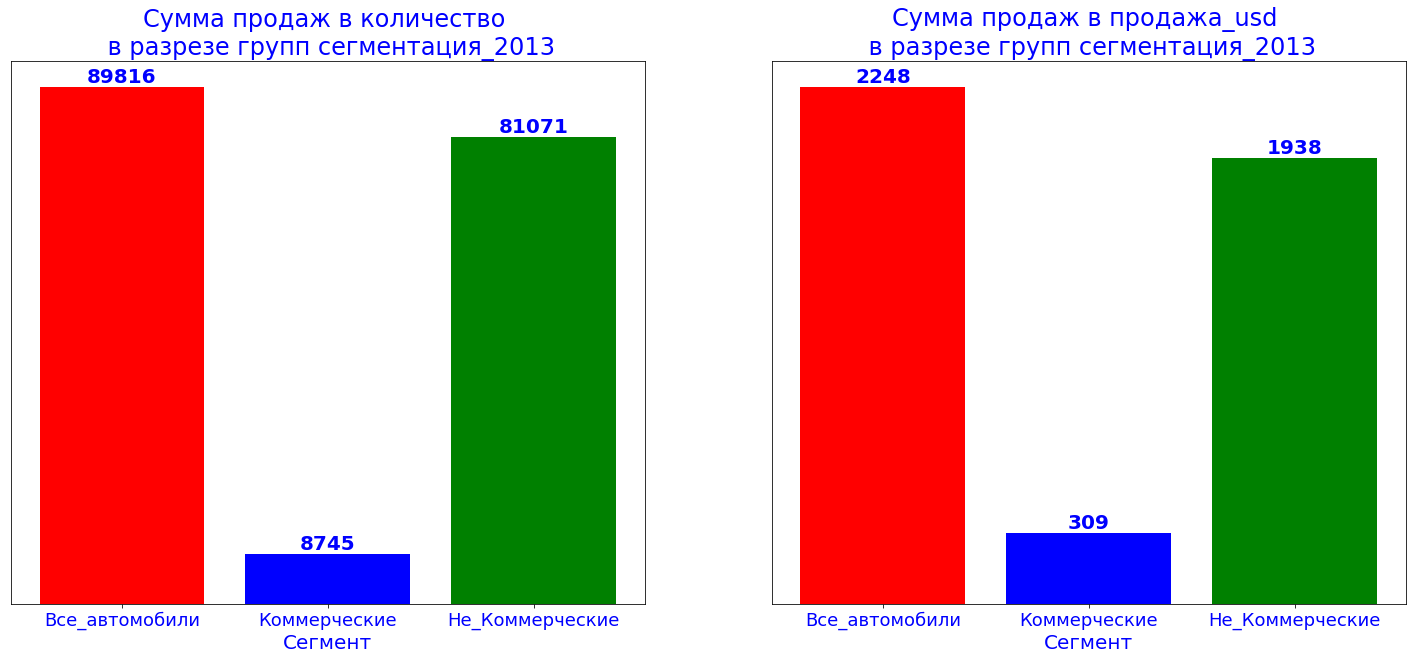

In [ ]:
# задаём размер сетки для графиков
plt.figure(figsize=(25, 10))
# в первой ячейке строим распределение по группе А
ax1 = plt.subplot(1, 2, 1)
# вызываем функцию
plot1(final_wer, 'сегментация_2013', 'количество', ax1)
# во второй ячейке строим распределение по группе В
ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
plot1(final_wer, 'сегментация_2013', 'продажа_usd', ax2)

Годовой объем рынка составил 89816 автомобилей, подавляющее большинство которых - 90.3% - некоммерческие автомобили.  
В денежном выражении годовой объем составил 2.248 миллионов долларов, из которых 86.2% приходится на некоммерческие автомобили.



### Марки лидеры на рынке автомобилей

In [ ]:
# подготовим данные для пары линейных графиков
brends = data.groupby('бренд').agg({'количество':'sum','продажа_usd':'sum'})\
    .sort_values('продажа_usd', ascending = False).reset_index()
# приведем к тысячым долларов
brends.продажа_usd = (brends.продажа_usd/10**3).astype(int)

In [ ]:
top_usd = brends.nlargest(5, 'продажа_usd')
top_quan = brends.nlargest(5, 'количество')

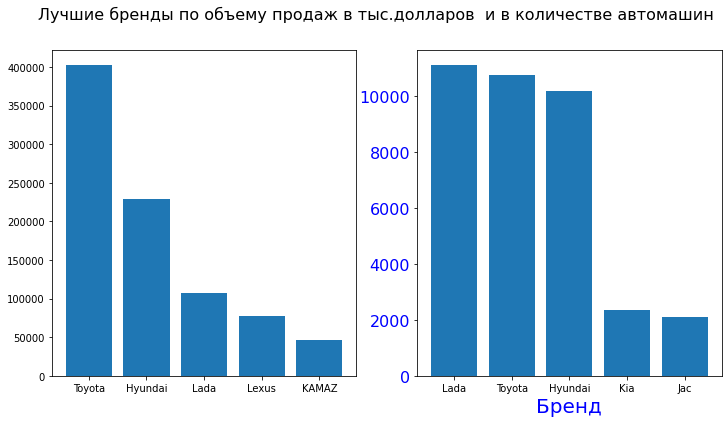

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].bar(top_usd.бренд, top_usd.продажа_usd)
plt.xlabel('Бренд', fontsize=20, color = "b")
plt.yticks(rotation=0, fontsize=16, color = "b")

ax[1].bar(top_quan.бренд, top_quan.количество)
#plt.title(f'Продажи в количественном и денежном выражении', fontsize=24, color = "b")
plt.xlabel('Бренд', fontsize=20, color = "b")
   # plt.xticks(rotation=0, fontsize=18, color = "b")
   # plt.yticks(rotation=0, fontsize=16, color = "r")
   # ax1 = ax.twinx()
   # ax.set_ylabel('Для красного графика (количество)', fontsize=16, color = "r")
   # ax1.set_ylabel('Для синего графика (тысяч долларов)',fontsize=16, color = "b")
   # plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.yticks(rotation=0, fontsize=16, color = "b")

fig.suptitle('Лучшие бренды по объему продаж в тыс.долларов  и в количестве автомашин', fontsize=16)
plt.show()

In [ ]:
bottom_usd = brends.nsmallest(5, 'продажа_usd')
bottom_quan = brends.nsmallest(5, 'количество')

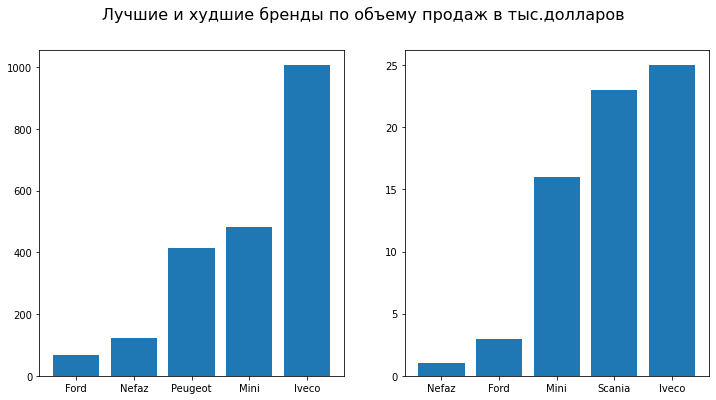

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].bar(bottom_usd.бренд, bottom_usd.продажа_usd)
ax[1].bar(bottom_quan.бренд, bottom_quan.количество)
fig.suptitle('Лучшие и худшие бренды по объему продаж в тыс.долларов', fontsize=16)
plt.show()

Тойота, Хундай и Лада входят в тройку лидеров продаж как в денежном выражении, так и в количестве.  
Причем если в количественном измерении объемы продаж этих марок находятся на примерно одиниковом урровне и Лада возглавляет список, то в денежном измерении явным лидером является Тойота, за которой следуеи Хундай.  
Важно заметить, что Тойота является лидером со значительным отрывом: находящийся на 5-м место Камаз имеет объем продаж в 8 раз меньший, чем Тойота.

С другого конца списка мы видим единичные продажи - Нефаз и Форд имеют соответсвенно, 1 и 3 проданные единицы за весь период.

### Динамика рынка: общая и по сегментам

Динамика рынка по всем автомобилям. Соберем данные в переменную `seasons_din`

In [ ]:
# подготовим данные
seasons_din = data.groupby('дата').agg({'количество':'sum','продажа_usd':'sum'})\
    .sort_values('дата')#.reset_index()
# приведем к тысячым долларов
seasons_din.продажа_usd = (seasons_din.продажа_usd/10**3).astype(int)
seasons_din.количество = (seasons_din.количество).astype(int)
seasons_din

,количество,продажа_usd
дата,,
2019-01-01,4517,113866
2019-02-01,4493,110345
2019-03-01,5055,128065
2019-04-01,5868,146097
2019-05-01,6438,164123
2019-06-01,6459,162761
2019-07-01,7778,203177
2019-08-01,6641,158184
2019-09-01,6641,162519


Вывзовем функцию `plot2`

In [ ]:
a1 = 'количество'
b1 = 'продажа_usd'

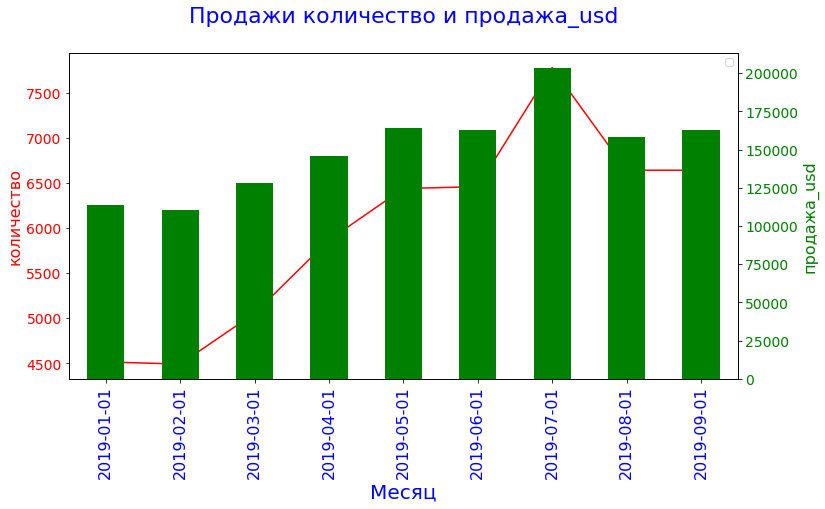

In [ ]:
plot2(seasons_din, a1, b1, "Продажи", "Месяц")

Динамика рынка по коммерческим автомобилям. Соберем данные в переменную `seasons_din_commerz` и вызовем функцию `plot2`

In [ ]:
seasons_din_commerz = data.query('сегментация_2013 == "Коммерческие автомобили"').groupby('дата').agg({'количество':'sum','продажа_usd':'sum'})\
    .sort_values('дата')#.reset_index()
# приведем к тысячым долларов
seasons_din_commerz.продажа_usd = (seasons_din_commerz.продажа_usd/10**3).astype(int)
seasons_din_commerz.количество = (seasons_din_commerz.количество).astype(int)

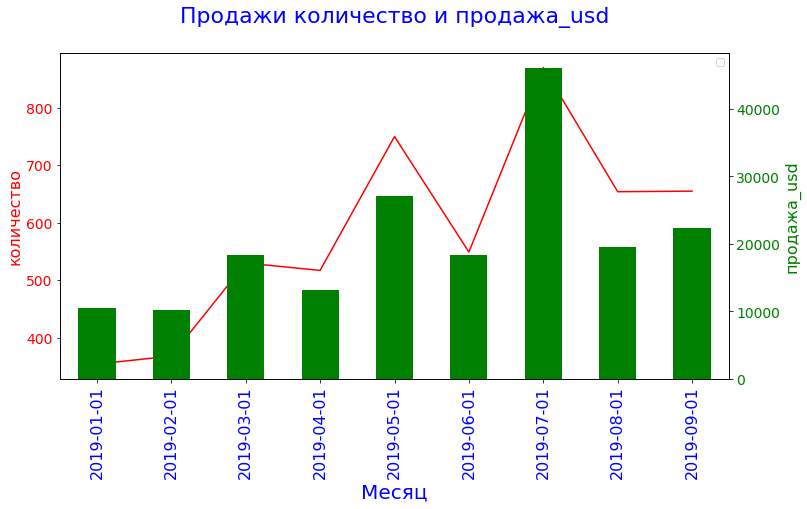

In [ ]:
plot2(seasons_din_commerz, a1, b1, "Продажи", "Месяц")

Динамика рынка по всем автомобилям. Соберем данные в переменную `seasons_din`

Динамика рынка по некоммерческим автомобилям. Соберем данные в переменную `seasons_din_non_commerz` и вызовем функцию `plot2`

In [ ]:
seasons_din_non_commerz = data.query('сегментация_2013 != "Коммерческие автомобили"').groupby('дата').agg({'количество':'sum','продажа_usd':'sum'})\
    .sort_values('дата')#.reset_index()
# приведем к тысячым долларов
seasons_din_non_commerz.продажа_usd = (seasons_din_non_commerz.продажа_usd/10**3).astype(int)
seasons_din_non_commerz.количество = (seasons_din_non_commerz.количество).astype(int)

In [ ]:
seasons_din

,количество,продажа_usd
дата,,
2019-01-01,4517,113866
2019-02-01,4493,110345
2019-03-01,5055,128065
2019-04-01,5868,146097
2019-05-01,6438,164123
2019-06-01,6459,162761
2019-07-01,7778,203177
2019-08-01,6641,158184
2019-09-01,6641,162519


In [ ]:
seasons_din_non_commerz

,количество,продажа_usd
дата,,
2019-01-01,4163,103405
2019-02-01,4125,100105
2019-03-01,4525,109683
2019-04-01,5351,132851
2019-05-01,5688,137047
2019-06-01,5910,144337
2019-07-01,6908,157156
2019-08-01,5987,138640
2019-09-01,5986,140102


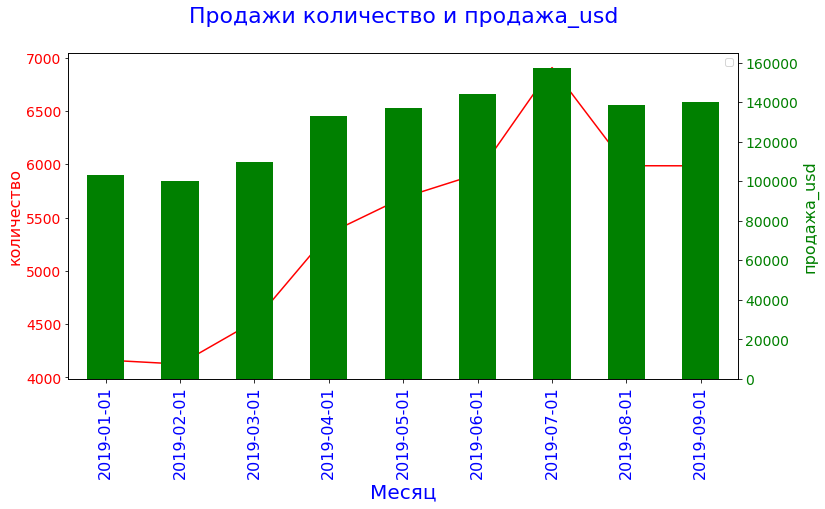

In [ ]:
plot2(seasons_din_non_commerz, a1, b1, "Продажи", "Месяц")

Видим равномерный рост количества и денежного объема продаж до июля включительно в сегменте некоммерческого транспорта и снижение в августе-сентябре.  
Для коммерческого транспорта динамика прерывисттая с максимумом продаж также в июле и дальнейшим снижением

### Продажи автомобилей в разрезе бренд / сегмент

In [ ]:
pivot_data = pd.pivot_table(data=data,
                            index='бренд',  # колонки слева
                            columns='сегментация_2013',  # колонки сверху
                            values='продажа_usd',  # что будем использовать в качестве значений ячеек (продажи)
                            aggfunc='sum',  # аггрегирующая функция (у нас сумма)
                            fill_value=0)  # заполняем ли NaN и чем (мы - нулями)


In [ ]:
pivot_data = pivot_data.sort_values('Легковые автомобили', ascending=False)

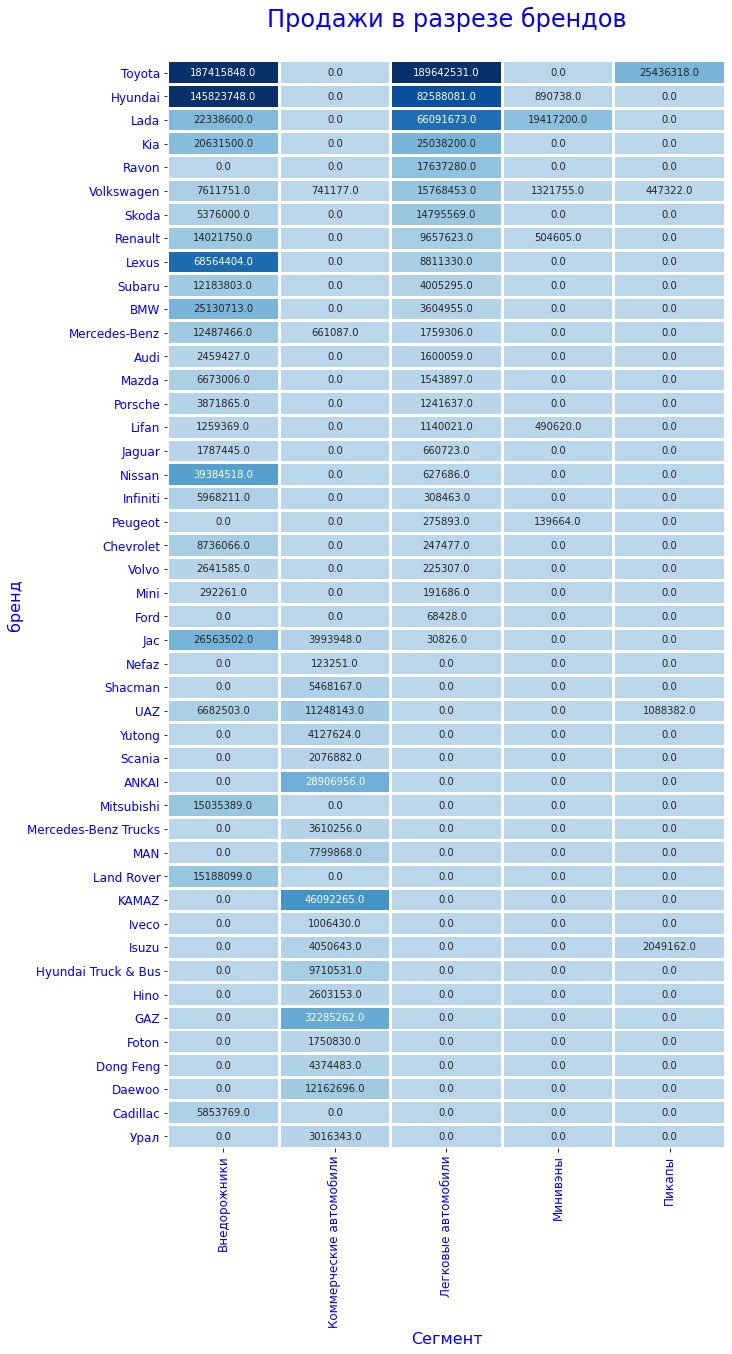

In [ ]:
plot3(pivot_data, 0, 30000000, 100000000, "бренд")

In [ ]:
cs = pivot_data.cumsum()
cs = cs.query('index=="Урал"')

In [ ]:
cs.rename(columns = {'Урал':'Итого'}, inplace = True)
cs.index = cs.index.map({'Урал':'Итого'})

In [ ]:
cs_con = pd.concat([pivot_data, cs])

In [ ]:
cs_con_col = cs_con.columns.tolist()

In [ ]:
cs_con_new = pd.DataFrame()

In [ ]:
cs_con_new_col = ['suv_per', 'track_per', 'car_per', 'ven_per', 'pikup_per']

In [ ]:
def func1(new_col, old_col):
    cs_con_new[new_col] = cs_con[old_col] / cs_con.query('index == "Итого"')[old_col][0] * 100

In [ ]:
for i in range(len(cs_con_new_col)):
    func1(cs_con_new_col[i], cs_con_col[i])

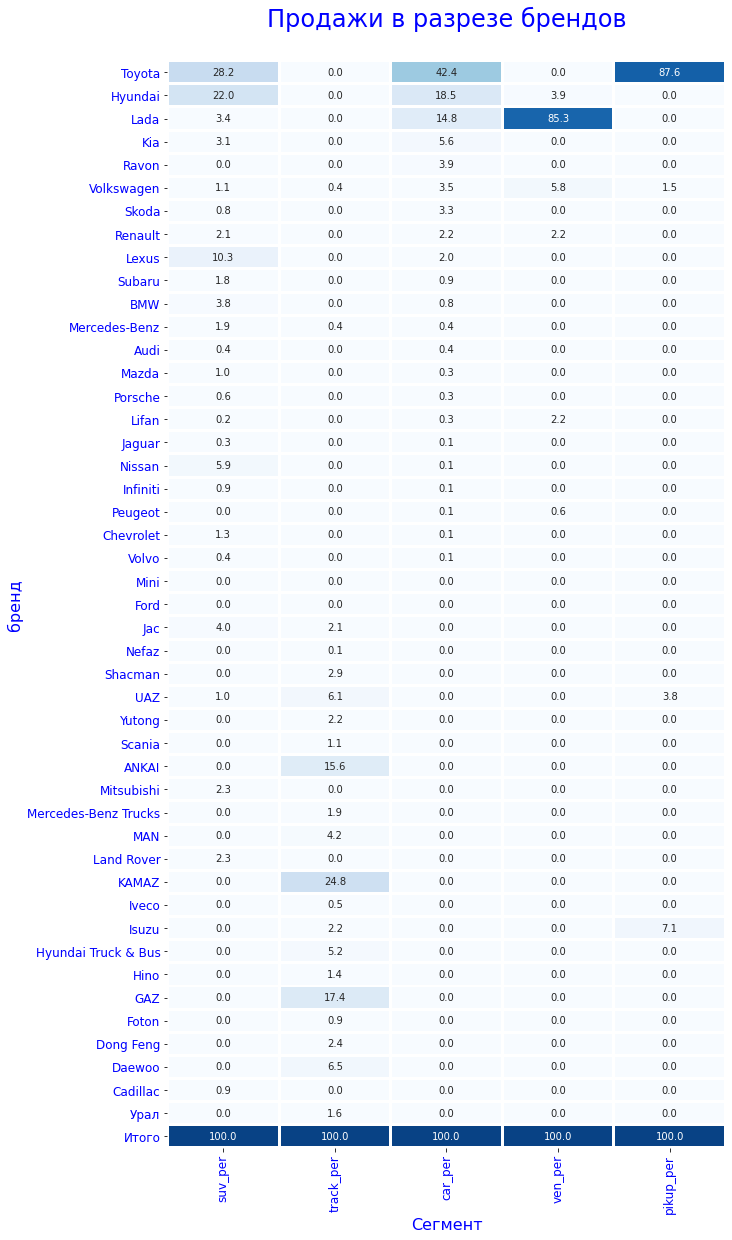

In [ ]:
plot3(cs_con_new, 3, 55, 100, "бренд")

На тепловой карте, построенной на основании долей продаж в сегменте можно легко увидеть:
- Тойота и Хундай занимают половину продаж в сегменте внедорожников
- Камаз, Газ и ANKAI белят тройку лидеров в сегменте коммерческих автомобилей
- Тойота, Хундай и Лада - тройка лидеров в сегменте легковых машин - на их совокупную дол. приходтся 76% - то етсь три четверти объема
- недосягаемый лидер в классе минивенов - Лада.
- а в сегменте пикапов главенствует Тойота

### Продажи автомобилей в разрезе регионов

In [ ]:
pivot_rigions = pd.pivot_table(data=data,
                            index='область',  # колонки слева
                            columns='сегментация_2013',  # колонки сверху
                            values='продажа_usd',  # что будем использовать в качестве значений ячеек (продажи)
                            aggfunc='sum',  # аггрегирующая функция (у нас сумма)
                            fill_value=0)  # заполняем ли NaN и чем (мы - нулями)


In [ ]:
pivot_rigions = pivot_rigions.sort_values('Легковые автомобили', ascending=False)

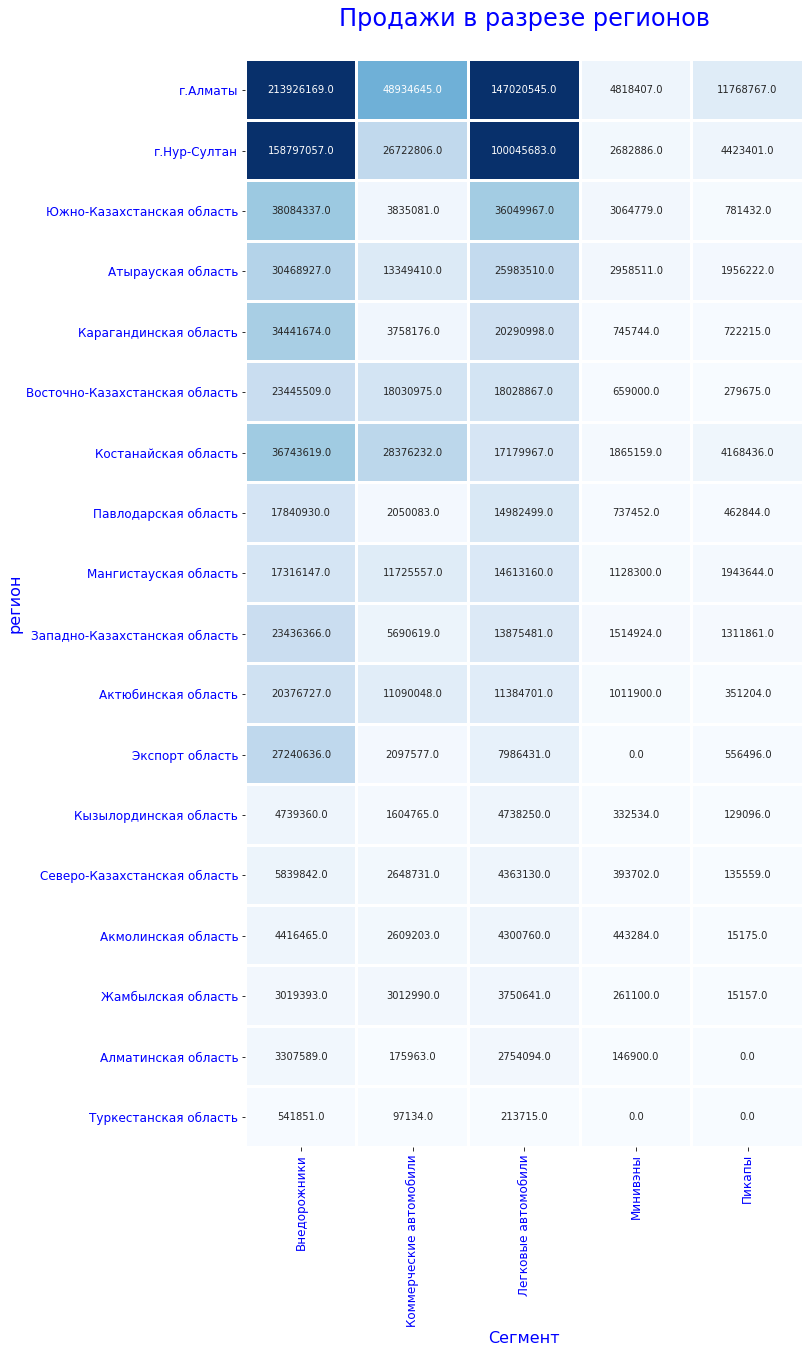

In [ ]:
plot3(pivot_rigions, 0, 50000000, 100000000, "регион")

На тепловой карте, построенной на основании продаж в разрезе регионов можно увидеть:
- Алматы и Нур-Султан лидируют в продажаъ всех сегментов автомобилей.
- бОльшей популярностью во всех регионах пльзуются внедорожники, нежели легковые автомобили.
- Популярность минивэнов и пикапов мала по сравнению с внедорожниками и минивэнами.
- Коммерческие автомобили имеют наибольшие продажи в Алматы, Костанайской области, Нур-Султане
 - здесь был бы любопытен анализ в разрезе сегментов коммерческих автомобилей.

##  Проверим гипотезу
Проверим гипотезу: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону).  
Поскольку мы имеем в виду оценку платежеспособности населения, учтем при проверке продажи только физическим лицам

In [ ]:
# Создадим фильтр и запишем его в переменную sales_and_salary
sales_and_salary = data.query('тип_клиента == "Физлицо"')\
    .groupby('область').agg({'цена_usd':'mean'}).astype(int)#.reset_index()
# Удалим строку "Экспорт область"
sales_and_salary = sales_and_salary.query('область != "Экспорт область"')
# добавим столбец со средней зарплатой по областям
sales_and_salary['средняя_ЗП_теньге'] = sales_and_salary.index.map(salary_dict)
# отсортируем по убыванию размера зарплаты
sales_and_salary = sales_and_salary.sort_values('средняя_ЗП_теньге', ascending = False)
sales_and_salary

,цена_usd,средняя_ЗП_теньге
область,,
Атырауская область,25775,351103
Мангистауская область,23997,294099
г.Нур-Султан,29913,226796
г.Алматы,32194,224158
Западно-Казахстанская область,24875,183914
Карагандинская область,23976,172239
Восточно-Казахстанская область,23633,162182
Павлодарская область,23946,160670
Актюбинская область,26598,156595


In [ ]:
a2 = 'цена_usd'
b2 = 'средняя_ЗП_теньге'

In [ ]:
def plot2(dataname, aa, bb, title_text, x_text):

    x = dataname.index
    a = dataname[aa]
    b = dataname[bb]


    fig, ax = plt.subplots(figsize=(12,6))
    plt.title(f'{title_text} {aa} и {bb}\n', fontsize=22, color = "b")
    plt.xlabel(f'{x_text}', fontsize=20, color = "b")
    plt.xticks(rotation=90, fontsize=16, color = "b")
    plt.yticks(rotation=0, fontsize=14, color = "r")
    ax1 = ax.twinx()
    ax.set_ylabel(f'{aa}', fontsize=16, color = "r")
    ax1.set_ylabel(f'{bb}',fontsize=16, color = "g")
    plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
    plt.yticks(rotation=0, fontsize=14, color = "g")

    #plt.plot(x,a,color='r')
    #ax.plot(x,b,color='b')
    ax.plot(x,a,color='r')

    dataname[bb].plot(kind = 'bar',ax=ax1, color = 'g')

    plt.show()

    return

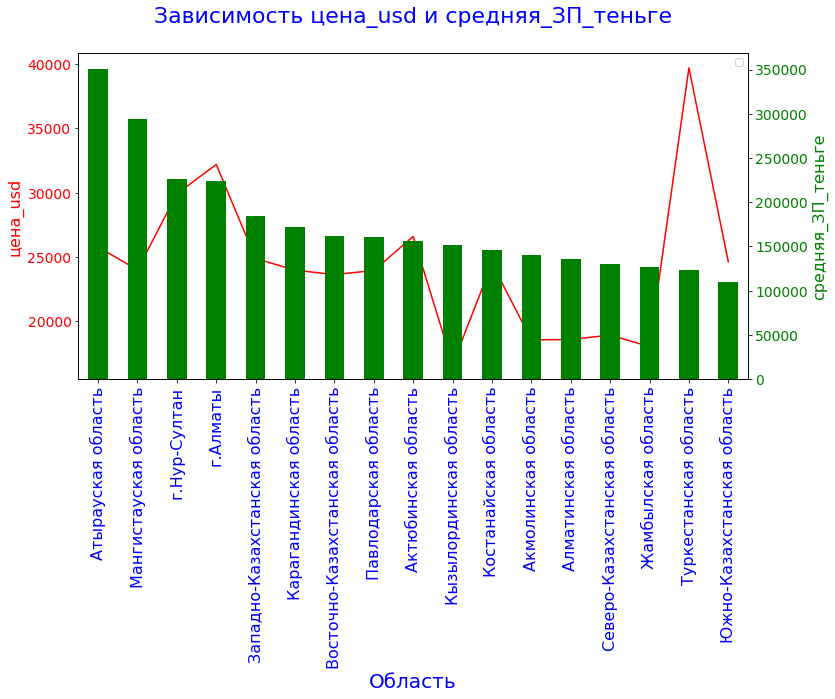

In [ ]:
plot2(sales_and_salary, a2, b2, "Зависимость", "Область")

Для средней части графика действительно существует зависимость - средн графика совпадает.  
А начальная часть графика - Атырауская  и Мангистауская область	и его завершающая часть Туркестанская и Южно-Казахстанская область - такая зависимость отсутствует.  
Гипотеза о зависимости стоимости автомобиля от уровня развития региона (средней заработной платы по региону) подтверждается частично.


## Выводы и заключения
### На этапе ознакомления и предобработки предоставленных данных:

- Удалены столбцы, которые не окажут влияния на анализ в соответствии с ТЗ
- Произведена обработка данных в столбцах:
 - вид_топлива
 - объём_двиг_л
 - коробка_передач
 - тип_привода
 - тип_клиента
 - количество
 - наименование_дилерского_центра
- Произведена сегментация по объему двигателя
- Приведены названия стран к буквенному коду
- Создан столбец, объединяющая номер месяца и год




### Исследовательский анализ предоставленных данных показал следующее:
- 90.3% продаж в единицах проданных автомашин - некоммерческие автомобили. В денежном выражении 86.2% приходится на некоммерческие автомобили.

- Тойота, Хундай и Лада входят в тройку лидеров продаж как в денежном выражении, так и в количестве. Лада возглавляет список в количественном измерении объемы продаж. Тойота и Хундай - лидеры в денежном измерении объема продаж

- Существует равномерный рост количества и денежного объема продаж до июля включительно в сегменте некоммерческого транспорта и снижение в августе-сентябре. Для коммерческого транспорта динамика прерывистая с максимумом продаж также в июле и дальнейшим снижением

- Анализ продаж в сегментах:
 -	Тойота и Хундай занимают половину продаж в сегменте внедорожников
 -	Камаз, Газ и ANKAI делят тройку лидеров в сегменте коммерческих автомобилей
 -	Тойота, Хундай и Лада - тройка лидеров в сегменте легковых машин - на их совокупную долю приходится 76% - то есть три четверти объема
- Анализ продаж в разрезе регионов:
 -	Алматы и Нур-Султан лидируют в продажах всех сегментов автомобилей.
 -	бОльшей популярностью во всех регионах пользуются внедорожники, нежели легковые автомобили.
 -	Коммерческие автомобили имеют наибольшие продажи в Алматы, Костанайской области, Нур-Султане
- Гипотеза о зависимости стоимости автомобиля от уровня развития региона (средней заработной платы по региону) подтверждается частично. Не выявлена зависимость для регионов: Атырауская, Мангистауская, Туркестанская и Южно-Казахстанская область.


